In [1]:
import os
import torch
from torch.utils.data import DataLoader
from dataset.data_preparation import download, split_dataset
from dataset.super_resolution_dataset import SuperResolutionDataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(777)
transform = transforms.Compose([
        transforms.ToTensor()
    ])
download("./data", "airplanes")
root_dir = 'data/airplanes'
dataset = SuperResolutionDataset(root_dir=root_dir, transform=transform)
dataset_dataloader = DataLoader(dataset, batch_size=16, shuffle=True)
save_dir = 'data/preprocessed_dataset'
os.makedirs(save_dir, exist_ok=True)


Dataset airplanes already exists.


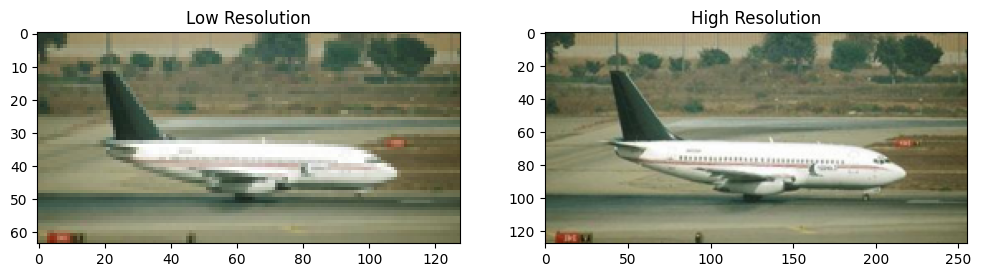

In [3]:
low_res, high_res = next(iter(dataset_dataloader))
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Tensors (channels, height, wight)
# matplot (height, wight, channels)
ax[0].imshow(low_res[0].permute(1, 2, 0))
ax[0].set_title("Low Resolution")

ax[1].imshow(high_res[0].permute(1, 2, 0))
ax[1].set_title("High Resolution")

plt.show()

In [4]:
sizes = {
    "train":0.5,
    "validation":0.3,
    "test":0.2
}
train, validation, test = split_dataset(dataset,sizes)

train_dataloader = DataLoader(train, batch_size=16, shuffle=True)
validation_dataloader = DataLoader(validation, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test, batch_size=16, shuffle=True)

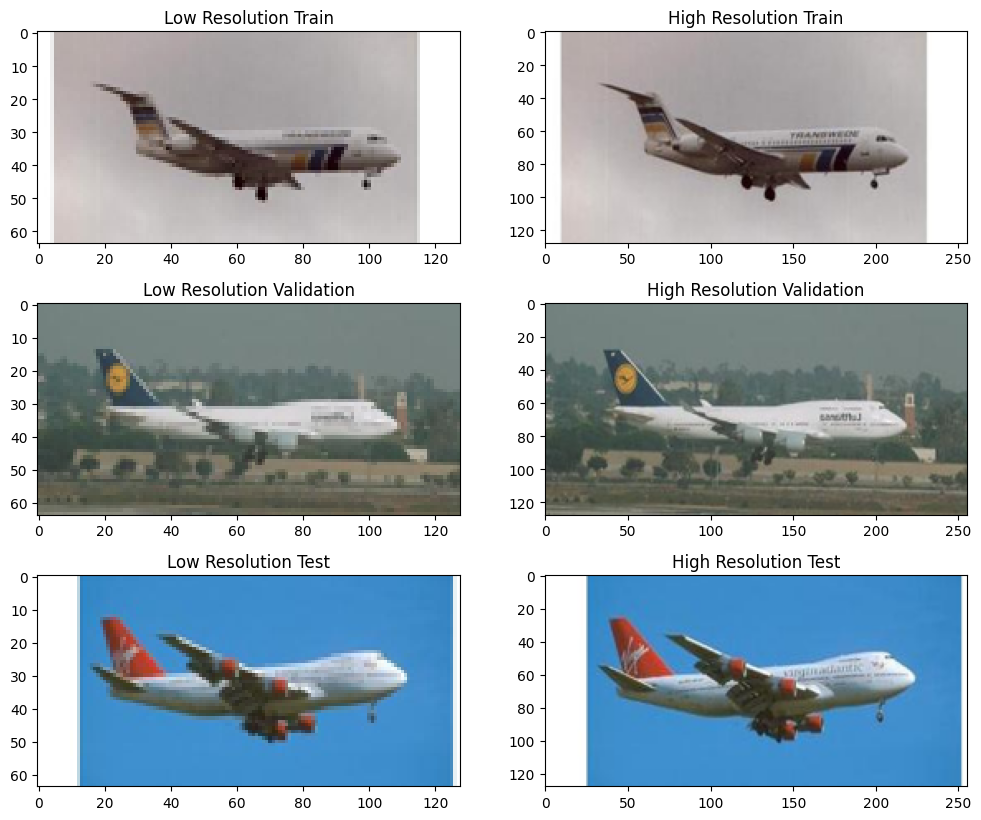

In [17]:
low_res_train, high_res_train = next(iter(train_dataloader))
low_res_validation, high_res_validation = next(iter(validation_dataloader))
low_res_test, high_res_test = next(iter(train_dataloader))
_ , ax = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('Train-Validation-Test samples')

ax[0,0].imshow(low_res_train[0].permute(1, 2, 0))
ax[0,1].imshow(high_res_train[0].permute(1, 2, 0))
ax[1,0].imshow(low_res_validation[0].permute(1, 2, 0))
ax[1,1].imshow(high_res_validation[0].permute(1, 2, 0))
ax[2,0].imshow(low_res_test[0].permute(1, 2, 0))
ax[2,1].imshow(high_res_test[0].permute(1, 2, 0))

ax[0,0].set_title("Low Resolution Train")
ax[0,1].set_title("High Resolution Train")
ax[1,0].set_title("Low Resolution Validation")
ax[1,1].set_title("High Resolution Validation")
ax[2,0].set_title("Low Resolution Test")
ax[2,1].set_title("High Resolution Test")

plt.show()